<a href="https://colab.research.google.com/github/DavidVollendroff/DS-Unit-1-Build/blob/master/David_Vollendroff_DS10_Build_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:

df = pd.read_json("https://calculated.gg/api/global/graphs")

In [0]:
ranks = ['Silver 1', 'Silver 2', 'Silver 3', 'Gold 1', 'Gold 2', 'Gold 3', 'Platinum 1', 'Platinum 2', 'Platinum 3', 'Diamond 1', 'Diamond 2', 'Diamond 3', 'Champion 1', 'Champion 2', 'Champion 3', 'Grand Champion']
useless_cols = ['first frame in game', 'rank', 'is keyboard', 'time in game', 'time in front of center of mass', 'time behind center of mass', 'time furthest from team center', 'time most forward player', 'time most back player', 'time closest to team center', 'time close to ball', 'ball hit backward', 'ball hit forward', 'time closest to ball']


In [0]:
df = df[13] # most recent data

In [0]:
 df = df.reset_index().transpose()

In [6]:
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.drop(useless_cols, axis=1)
df.head()

index,aerial efficiency,aerials,assists,assists/hit,average boost level,average distance from center,average hit distance,boost ratio,boost usage,collection boost efficiency,dribbles,goals,hits,mmr,num large boosts,num small boosts,num stolen boosts,passes,passes/hit,possession time,saves,score,shot %,shots,shots/hit,speed,takeaways,time at boost speed,time at slow speed,time at super sonic,time behind ball,time between players,time full boost,time furthest from ball,time high in air,time in attacking half,time in attacking third,time in corner,time in defending half,time in defending third,time in front ball,time in neutral third,time low boost,time low in air,time near wall,time no boost,time on ground,total boost efficiency,total dribble conts,total goals,total saves,total shots,turnover efficiency,turnovers,turnovers on my half,turnovers on their half,used boost efficiency,useful/hits,wasted big,wasted collection,wasted small,wasted usage
13,"[{'mean': 17.0075958055279, 'std': 6.014213153...","[{'mean': 6.80431930599862, 'std': 2.876507866...","[{'mean': 0.5323335567109291, 'std': 0.2816281...","[{'mean': 2.655244068626433, 'std': 1.52217530...","[{'mean': 134.390112496538, 'std': 15.85900086...","[{'mean': 2115.01431914988, 'std': 143.6850314...","[{'mean': 2582.10426551639, 'std': 222.2059763...","[{'mean': 3.537444822621178, 'std': 1.62687571...","[{'mean': 1837.13591941974, 'std': 384.7606526...","[{'mean': 0.79514390889815, 'std': 0.043487326...","[{'mean': 4.27447011899422, 'std': 1.951924494...","[{'mean': 0.881211065244025, 'std': 0.48560579...","[{'mean': 24.4884889506211, 'std': 5.179889725...","[{'mean': 1064.3696752280498, 'std': 298.67580...","[{'mean': 19.0534949917668, 'std': 4.345640224...","[{'mean': 68.2801031260026, 'std': 9.363308246...","[{'mean': 3.62733499444209, 'std': 1.322165197...","[{'mean': 4.98968385501285, 'std': 1.169217081...","[{'mean': 24.68847472600857, 'std': 5.01250366...","[{'mean': 49.410771296497, 'std': 9.5158739853...","[{'mean': 0.92252282213893, 'std': 0.386545839...","[{'mean': 314.2979006557, 'std': 91.2786642802...","[{'mean': 0.37744120631781103, 'std': 0.127974...","[{'mean': 2.29990309248197, 'std': 0.874857648...","[{'mean': 11.399603368222916, 'std': 3.8211004...","[{'mean': 14366.9865829422, 'std': 976.0778788...","[{'mean': 5.58893511989906, 'std': 1.311722628...","[{'mean': 151.994839594829, 'std': 23.72536449...","[{'mean': 32.9262127842656, 'std': 9.944096038...","[{'mean': 29.7783603272881, 'std': 11.57825959...","[{'mean': 214.386970121759, 'std': 10.77308249...","[{'mean': 98.2588960254332, 'std': 8.474786734...","[{'mean': 35.2510929677499, 'std': 16.41755624...","[{'mean': 51.1936999627972, 'std': 10.04423676...","[{'mean': 9.4379255187922, 'std': 4.2176505081...","[{'mean': 110.462666617818, 'std': 14.22462362...","[{'mean': 65.1646519577235, 'std': 11.08854560...","[{'mean': 3.83775795720306, 'std': 0.851291101...","[{'mean': 189.53713130841, 'std': 14.224748497...","[{'mean': 138.232817092584, 'std': 15.20941958...","[{'mean': 85.6130171502614, 'std': 10.76924585...","[{'mean': 96.6073967466766, 'std': 7.421305660...","[{'mean': 77.5699006534302, 'std': 18.55491778...","[{'mean': 109.421463776194, 'std': 14.81865285...","[{'mean': 65.863694213654, 'std': 8.0491840021...","[{'mean': 26.3674851138929, 'std': 9.529714844...","[{'mean': 179.848681968644, 'std': 17.31737795...","[{'mean': 0.726576414469221, 'std': 0.04375354...","[{'mean': 4.22750530088291, 'std': 1.883569195...","[{'mean': 0.119206553415304, 'std': 0.12020937...","[{'mean': 0.9222751268230671, 'std': 0.4025855...","[{'mean': 1.35298738937559, 'std': 0.584518247...","[{'mean': 73.49742858649492, 'std': 4.45239736...","[{'mean': 5.37072497421567, 'std': 1.109114665...","[{'mean': 2.26236860063783, 'std': 0.658351124...","[{'mean': 2.27553677657609, 'std': 0.625134923...","[{'mean': 0.8991449340021741, 'std': 0.0333355...","[{'mean': 41.61573334304915, 'std': 6.32706955...","[{'mean': 499.431472779

In [0]:
# splitting the JSON data into mean and standard deviation from its dictionaries
mean_df = pd.DataFrame(np.zeros((20, len(df.columns))))
for graph_type in range(len(df.iloc[0])):
  for rank in range(len(df.iloc[0][0])):
    mean_df.iloc[rank][graph_type] = df.iloc[0][graph_type][rank]['mean']

mean_df.columns = df.columns
mean_df.drop([0,1,2,3], inplace=True)
mean_df.index = ranks

mean_df['average boost level'] = mean_df['average boost level'] / 255 # cleaning
#mean_df.head(30)

In [8]:
# This cell used for data exploration
correlation = pd.Series(mean_df.corr()['mmr'])
pd.set_option('display.max_rows', len(correlation))
absolute_correlation = (correlation**2)**(0.5)
absolute_correlation.sort_values(ascending=False)

index
mmr                             1.000000
turnovers on my half            0.992820
saves                           0.991607
aerial efficiency               0.988816
num small boosts                0.988716
total boost efficiency          0.987207
turnovers                       0.985803
total saves                     0.983529
time at slow speed              0.981468
collection boost efficiency     0.978087
shot %                          0.977814
average hit distance            0.966534
boost usage                     0.963255
turnovers on their half         0.962178
speed                           0.961670
total shots                     0.960553
aerials                         0.958738
average distance from center    0.955634
time full boost                 0.952905
time at boost speed             0.952198
time in corner                  0.943667
hits                            0.942767
score                           0.936626
takeaways                       0.931266
num large 

In [0]:
# splitting the JSON data into mean and standard deviation from its dictionaries
std_df = pd.DataFrame(np.zeros((20, len(df.columns))))
for graph_type in range(len(df.iloc[0])):
  for rank in range(len(df.iloc[0][0])):
    std_df.iloc[rank][graph_type] = df.iloc[0][graph_type][rank]['std']

std_df.columns = df.columns
std_df.drop([0,1,2,3], inplace=True)
std_df.index = ranks
std_df['average boost level'] = std_df['average boost level'] / 255
#std_df.head(30)

In [10]:
# This cell used for data exploration
correlation = pd.Series(std_df.corr()['mmr'])
pd.set_option('display.max_rows', len(correlation))
absolute_correlation = (correlation**2)**(0.5)
absolute_correlation.sort_values(ascending=False)

index
mmr                             1.000000
turnovers on my half            0.842167
time at boost speed             0.709736
passes/hit                      0.676316
average distance from center    0.658251
useful/hits                     0.653173
boost usage                     0.653098
collection boost efficiency     0.649665
time at super sonic             0.637635
total boost efficiency          0.636961
turnover efficiency             0.630491
num large boosts                0.628291
time furthest from ball         0.626569
speed                           0.619498
turnovers                       0.617067
time in corner                  0.614164
time near wall                  0.610715
average boost level             0.608279
time low boost                  0.605184
time between players            0.604541
time low in air                 0.595853
used boost efficiency           0.593202
shots/hit                       0.593153
shot %                          0.591891
time on gr

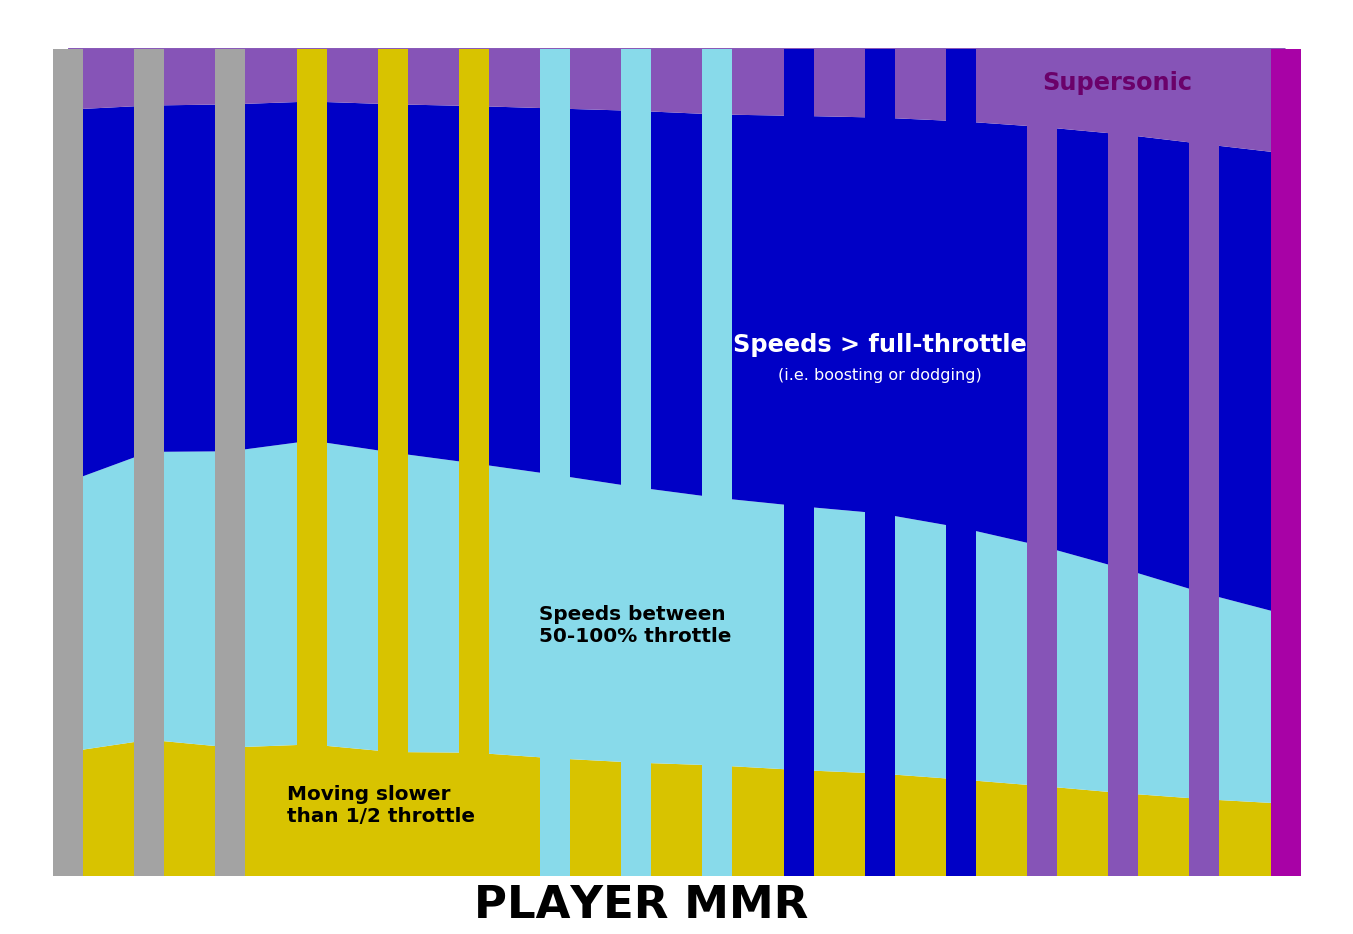

In [11]:
# adjusting the graph output size
plt.rcParams['figure.figsize'] = [24, 16]

# used a color-picker to choose colors close to the Rocket League rank scheme

colors = [(163/255, 163/255, 163/255),
          (163/255, 163/255, 163/255),
          (163/255, 163/255, 163/255),
          (216/255, 195/255, 0),
          (216/255, 195/255, 0),
          (216/255, 195/255, 0),
          (136/255, 218/255, 234/255),
          (136/255, 218/255, 234/255),
          (136/255, 218/255, 234/255),
          (0, 0, 198/255),
          (0, 0, 198/255),
          (0, 0, 198/255),
          (134/255, 84/255, 183/255),
          (134/255, 84/255, 183/255),
          (134/255, 84/255, 183/255),
          (168/255, 2/255, 166/255)]

area_colors = [(216/255, 195/255, 0), (136/255, 218/255, 234/255),
          (0, 0, 198/255), (134/255, 84/255, 183/255)]
          
x = ranks

y1 = mean_df['time at slow speed']
y2 = 0
y3 = mean_df['time at boost speed']
y4 = mean_df['time at super sonic']

y2 = np.ones(len(y1))*300 - y1 - y3 -y4

y = np.vstack([y1, y2, y3, y4])

fig, ax = plt.subplots()
ax.stackplot(x, y, colors=area_colors)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# assorted area labels

ax.text(s="Moving slower\nthan 1/2 throttle",
        fontsize=20,
        fontweight='bold',
        x=2.7,
        y=20,
        color='black')

ax.text(s="Speeds between\n50-100% throttle",
        fontsize=20,
        fontweight='bold',
        x=5.8,
        y=85,
        color='black')

ax.text(s="Speeds > full-throttle",
        fontsize=24,
        fontweight='bold',
        x=10,
        y=190,
        color='white',
        ha='center')

ax.text(s="(i.e. boosting or dodging)",
        fontsize=16,
        fontweight='light',
        x=10,
        y=180,
        color='white',
        ha='center')

ax.text(s="Supersonic",
        fontsize=24,
        fontweight='bold',
        x=12,
        y=285,
        color=(168/400, 2/400, 166/400))

ax.text(s="PLAYER MMR",
        fontsize=45,
        fontweight='bold',
        x=5,
        y=-15,
        color='black')

ax.set_xticks([])
ax.set_yticks([])

for i in range(len(colors)):
  plt.axvline(i, 0.018,0.9345, color=colors[i], linewidth=30)

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


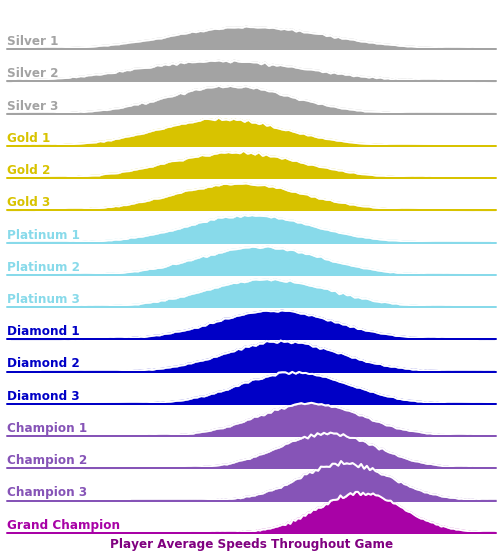

In [13]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Recreate distributions for plotting
average_speeds = pd.DataFrame([mean_df['speed']])
speeds_dev = pd.DataFrame([std_df['speed']])
plot_df = pd.DataFrame()
for col in average_speeds.columns:
  data_list = np.random.normal(average_speeds[col], speeds_dev[col], 100000)
  plot_df = plot_df.append(pd.DataFrame({'Rank':[col for i in range(len(data_list))],'Speed':data_list}))
plot_df = plot_df[(plot_df['Speed']>10000) & (plot_df['Speed']<17000)]

# Initialize the FacetGrid object
g = sns.FacetGrid(plot_df, aspect=15, row='Rank', hue='Rank', height=.5, palette=sns.color_palette(colors))

# Draw the densities in a few steps
g.map(sns.kdeplot, "Speed", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Speed", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Speed")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.set(xticks=[])
plt.xlabel('Player Average Speeds Throughout Game', color='purple', fontweight='bold')
plt.xlim(left=10000, right=17000)
g.despine(bottom=True, left=True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:375: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout()
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


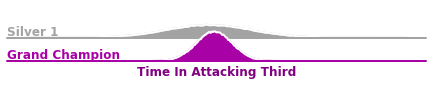

In [15]:
# creating a minor plot to drop into the blog for emphasis

colors = [colors[0], colors[-1]]
# Create the data

attacking_third = pd.DataFrame([mean_df['time in attacking third']])
attacking_third_dev = pd.DataFrame([std_df['time in attacking third']])
plot_df = pd.DataFrame()
for col in attacking_third.columns:
  data_list = np.random.normal(attacking_third[col], attacking_third_dev[col], 100000)
  plot_df = plot_df.append(pd.DataFrame({'Rank':[col for i in range(len(data_list))],'Time In Attacking Third':data_list}))
plot_df = plot_df[(plot_df['Rank']=='Silver 1') | (plot_df['Rank']=='Grand Champion')]

# Initialize the FacetGrid object
g = sns.FacetGrid(plot_df, aspect=15, row='Rank', hue='Rank', height=.5, palette=sns.color_palette(colors))

# Draw the densities in a few steps
g.map(sns.kdeplot, "Time In Attacking Third", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "Time In Attacking Third", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Time In Attacking Third")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.set(xticks=[])
plt.xlabel('Time In Attacking Third', color='purple', fontweight='bold')

g.despine(bottom=True, left=True)
plt.show()

In [16]:
# the following cell is used to calculate direct speed comparisons between
# low and high ranked players that I then used in my blog post.
silver_1 = plot_df[plot_df['Rank']=='Silver 1']
gc = plot_df[plot_df['Rank']=='Grand Champion']

def speed_test():
  silvers = np.random.normal(mean_df['speed']['Silver 1'], std_df['speed']['Silver 1'], size=6)
  gcs = np.random.normal(mean_df['speed']['Grand Champion'], std_df['speed']['Grand Champion'], size=4)
  silver_spot = np.argmax(silvers)
  gc_spot = np.argmin(gcs)
  if silvers[silver_spot] > gcs[gc_spot]:
    return 1
  else:
    return 0

silver_supremacy = 0
for i in range(10000):
  silver_supremacy += speed_test()
print(silver_supremacy/100, '%')


71.12 %
